<img src="https://vaastuyogam.com/wp-content/uploads/2017/05/Indian_Premier_League.png" width="240" height="360" />


# EDA for INSAID GCD(Term 1-2)  by Ravindra Banwari

# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Pre Profiling](#section3)<br/>
4. [Preprocessing](#section4)<br/>
5. [Post Profiling](#section5)<br/>
6. [Questions](#section6)
    - 1 : How many teams participating in IPL seasons.
    - 2 : Which teams were the winner and Runners up each session 
    - 3 : Which teams were the winner most of the team 
    - 4 : Highligh insight around  # the top 2 & 3 team ( Winner,Runnersup )
    - 5 : Top 3 teams that won when chasing a score 
    - 6 : Summary on  Matches won versus Matches won when chasing a score for all seasons
    - 7 : Teams wise summary on % of Matches won versus Matches won when chasing a score for all seasons
    - 8 : Top players ( by Man of the Match )
    - 9 : Relationship betwen winning a toss and winning  the match .
    - 10 : Relationship between a Venue ( City/Ground) to see any Home Advantage  
    - 11 : Highlight bowler related insights
    - 12 : Highlight batsman related insights
    - 13 : Most # of Boundaries by batsman    
    
7. [Conclusions](#section7)<br/>  

# 1. Problem Statement 

Study the IPL Data sets and find out a few correlation and insights .

# 2. Load and Describe the data 

There are 2 sets of data one for Matches and the other for Deliveries 
Match data set has details on all the matches played each session with the 2 teams playing and the winner team.

#### Following is the detail on all the fields for Match Data set :

    id =Match ID 
    season =Year of the season
    city =City where the match was played
    date =Date when th match was played
    team1=Participating team 1
    team2=Participating team 2
    toss_winner=team that won the toss 
    toss_decision=Toss wining teams decision to bat/field first 
    result=Result of the match 
    dl_applied =DL rule was applied in the match
    winner =Team that won the match 
    win_by_runs=Different between the scores when the winner team bowled out the opponent 
    win_by_wickets=Different between the wicket when the winner team chased out the opponents score 
    player_of_match =Award for the best player in the match
    venue =Ground where the match was played 
    umpire1=Umpire #1 
    umpire2=Umpire #2 
    winnerteam=A derived column to tell which team name  won the match 
    month=Derived column to show the month the match was played , this is helpful in identify data issue around date field  
    newdate=Dervied column , used to fix the original date field 
    TossWinnerIsWinner =Derived column to indicate if the winner of the toss was also winner of the match


#### The Delivery dataset is has details for all the session ball by ball . This included runs score by a batsman and other extra runs .

    match_id= Match ID 
    inning= Inning ID each match has 2 inning 1,2 .
    batting_team= name of the team that batted in that inning 
    bowling_team=name of the team that feiled  in that inning 
    over= Over Number 
    ball=Ball # in that over 
    batsman= name of the batsman at stike 
    non_striker=name of the batsman at stike 
    bowler=name of the bowler in that ball/over
    is_super_over=if that was a super over to decide the winner in case of a tie 
    wide_runs=# of runs extra to delivery was wide 
    bye_runs= # of runs due to bye 
    legbye_runs=# of runs due to leg bye 
    noball_runs=# of runs due to illegle delivery
    penalty_runs=# of runs due to any penalty
    batsman_runs=# of runs batsman scored in that ball.
    extra_runs=total extra runs (except of batsman_runs)
    total_runs=Total runs in that ball .
    player_dismissed= the batsman that got out in that delivery
    dismissal_kind= Type of dismissal in that delivery
    fielder=The field involved that help in the dismissal 
    dismissals=A dervied columns to indicate if the delivery yeild a wicket 

#### Both the data set are compliment to each to get a wholistic picture of a match and used together to pull differen insights during this EDA .

In [1]:
#!pip install pandas-profiling

import pandas as pd
import numpy as np
import pandas_profiling 
import seaborn as sns
import matplotlib.pyplot as plt   
import datetime
%matplotlib inline


In [71]:
filepath_matches="https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv"
filepath_deliveries="https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv"
mdf=pd.read_csv(filepath_matches)
ddf=pd.read_csv(filepath_deliveries)


In [72]:
mdf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,winnerteam,month,newdate,TossWinnerIsWinner
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,team1,4,2017-04-05,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,team2,4,2017-04-06,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,team2,4,2017-04-07,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,team2,4,2017-04-08,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,team1,4,2017-04-08,1


In [73]:
ddf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,dismissals
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,0


# 3. PreProfing

In [7]:
profile = pandas_profiling.ProfileReport(mdf)
profile.to_file(outputfile="matches_preprofile.html")

profile = pandas_profiling.ProfileReport(ddf)
profile.to_file(outputfile="delivery_preprofile.html")

# 4. PreProfing

#### This is  pre-processing of the Data sets 
#### Match Data Set:
 - "mdf" is the master data frame object for dataset - 'matches'
 - Dropping Column 'Umpire3' as that is not used .
 - Dropping Rows where there is no Winner that is match was either a draw or no decision was made. 
 - Adding a column 'Winnerteam' indicating which team won the match.
 - Correcting field value of team1,team2,winner,toss_winner where  'Rising Pune Supergiant' participated ( to deals with an extra 's'  in the name )
 - The date format  for feild 'date' is not uniform and needs correction .
 - New column 'month' desived from feild 'date' is add to dataframe.
 
#### Delivery Data set :
- "ddf' is the master data frame obeject for dataset 'Deliveries'
- Devire sub data set specific to a view of master data set and add required fields on that for processing .

### 4.1: Fix the data issue in the data set 'Matches" 

In [8]:
mdf.drop('umpire3', axis = 1,inplace = True) # Drop column umpire3 
mdf.dropna(subset=['winner'],inplace = True) # for row where winner is not availalble .

# There is data issue that is in some entries the team name is mentioned as "Rising Pune Supergiants" while its 'Rising Pune Supergiant'

mdf['team1']=mdf.apply(lambda x: 'Rising Pune Supergiant' if x['team1']=='Rising Pune Supergiants' else x['team1'],axis=1)
mdf['team2']=mdf.apply(lambda x: 'Rising Pune Supergiant' if x['team2']=='Rising Pune Supergiants' else x['team2'],axis=1)
mdf['toss_winner']=mdf.apply(lambda x: 'Rising Pune Supergiant' if x['toss_winner']=='Rising Pune Supergiants' else x['toss_winner'],axis=1)
mdf['winner']=mdf.apply(lambda x: 'Rising Pune Supergiant' if x['winner']=='Rising Pune Supergiants' else x['winner'],axis=1)
mdf['winnerteam']=mdf.apply(lambda x: 'team1' if x['winner']==x['team1'] else 'team2',axis=1)
mdf['month']=pd.to_datetime(mdf['date']).dt.month 



####  City is missing for matches played in Dubai Intenation Cricket Stadium hence replacing the city with Dubai

In [9]:
dubai_venue ='Dubai International Cricket Stadium'
dubai_city='Dubai'
mdf['city']=mdf.apply(lambda x : dubai_city if x['venue']==dubai_venue else x['city'],axis=1 )
mdf['city'].unique()


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

####   Follownig 2 graphs  plots the distribution of months over all the season . This is to find any abnormaliities in dateformate/date as most of the matches are played in the month of April (04) and May(05)

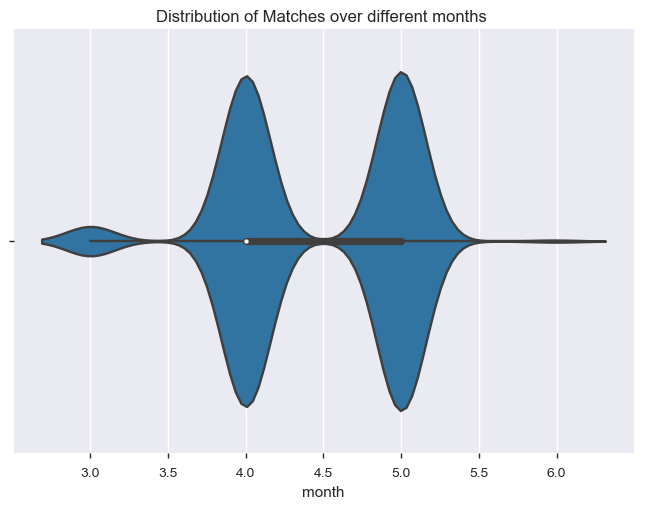

In [74]:
sns.violinplot('month', data = mdf)
plt.title("Distribution of Matches over different months ")
plt.show()

#### The above shows that month have a wider range as high as 12 however the IPL seasons are mostly densed around Months Arpil,May  and a few in March and June<br/><br/>  Season '2018' has incorrect date format and needs correction . The 2018 season end in May 2018 <br/><br/> Prepare a list of Season and months and use that to correct the data .



In [11]:
#Season : create a dictionary 

seasonmonthDict={ 2008:[4,5,6]
                 ,2009:[4,5]
                 ,2010:[3,4,5]
                 ,2011:[4,5]
                 ,2012:[4,5]
                 ,2013:[4,5]
                 ,2014:[4,5,6]
                 ,2015:[4,5]
                 ,2016:[4,5]
                 ,2017:[4,5]
                 ,2018:[4,5]
                }

#### For  2018 there are many entries with data as month/date/short year format like  '14/04/18' which is problematic hence need fixing .


In [12]:
dflist= list()
for index, row in mdf.iterrows():
#if row['id'] in [7925,7901] :
    y=int(pd.to_datetime(row['date']).year )
    m=int(pd.to_datetime(row['date']).month )
    d=int(pd.to_datetime(row['date']).day )
    # The following  is make sure 2/5/2018 is not considered a Feb 5,2018, Swap the date and month values as this 
    if ( m not in seasonmonthDict.get(y)) : m,d=d,m    
    newdate=datetime.datetime(y, m, d)
    rlist=(row['id'],newdate)
    dflist.append(rlist)
    
# this peice of code converts the list of list( ID ,NewDate) to a data frame 
mdfnewdate=pd.DataFrame.from_records(dflist)
mdfnewdate.rename(columns={mdfnewdate.columns[0]:'id',mdfnewdate.columns[1]:'date'},inplace=True)
# this below code does a left join on both the datafram master and new to add the New Date filed
# and assigns it back to original master data fram in to master one
mdf=pd.merge(left=mdf,right=mdfnewdate, on='id',how='left')
mdf.rename(columns={'date_x':'date','date_y':'newdate'},inplace=True)

#### After fixing the date field , recalculate the month field 

In [13]:

# fix the Month column by using the newdata field calculated above 
mdf['month']=pd.to_datetime(mdf['newdate']).dt.month 

#### Check the distribution back for month .

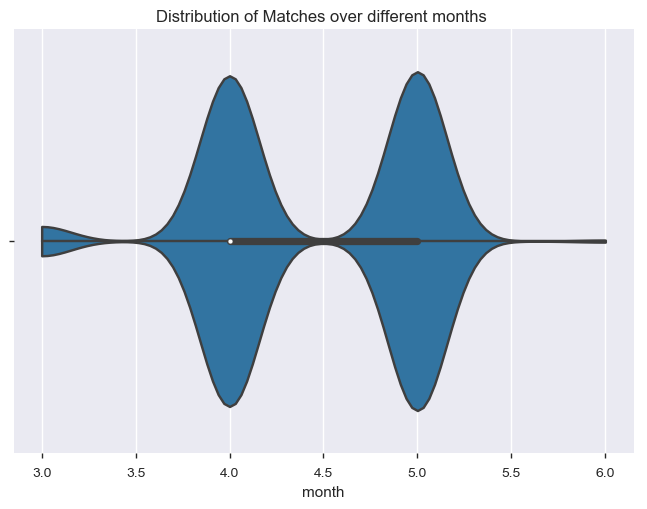

In [14]:

sns.violinplot('month', data = mdf,cut=0)
plt.title("Distribution of Matches over different months ")
plt.show()

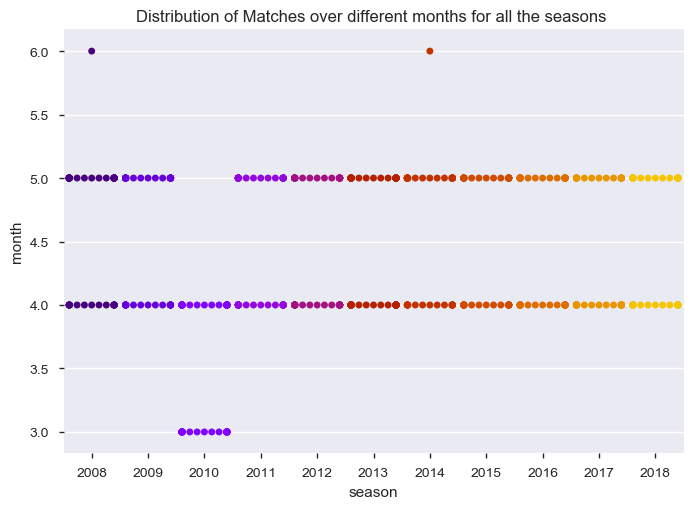

In [15]:
sns.swarmplot(x='season', y='month', palette='gnuplot', data=mdf)
plt.title("Distribution of Matches over different months for all the seasons ")
plt.show()


### Observation :

- After adding a new date columns we can notice now the issue with date is reoslved and we can notice the IPL sessions mostly are around month of April and May and only a few in March ( 2010 and 2018)  and June (2008,2014)

### 4.1: Fix the data issue on Delivery Dataset

- Prepare a subdata set with only Season and Match ID column, from Matches DataSet ,to be used in Join further .
- Add a new column 'Dismissal' which is 1 of the delivery yeiled a wicked else 0 to process it later.
- Join the delivery Data set with Match Master Data Frame (mdf) to get Season columns 
- Drop the rows where seasson column having null values.


In [16]:
matchidseason=mdf[['id','season','newdate']].drop_duplicates()
# Create a datafram with Season and Match ID 


In [17]:

ddf['dismissals']=ddf.apply(lambda x: 1 if x['player_dismissed']is not np.NAN else 0 ,axis=1)
bowler=pd.merge(left=ddf,right=matchidseason,left_on='match_id',right_on='id',how='left')
bowler.dropna(subset=['season'], inplace = True)
bowler['season']=bowler.apply( lambda x :int(x['season']) ,axis=1)
bowler['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

# 5. Post profiling .

- Use the Pandas profing package and regenerate the profile report and recheck for any data challages , if there are no challenges to get the required results move ahead in finding answers to the problem stated .s

In [18]:
profile = pandas_profiling.ProfileReport(mdf)
profile.to_file(outputfile="matches_postprofile.html")

# 6 Questions :

 


####  1: How many teams participating in IPL seasons.
####  2: Which teams were the winner and Runners up each session 
####  3: Which teams were the winner most of the team 
####  4: Highligh insight around  # the top 2 & 3 team ( Winner,Runnersup )
	   1 : All the teams and the number of matches they won each session .
	   2 : Top 3 team in each session ( based on # of matches those won )
	   3 : Winner and Runners up  with number of matches won by them 
#### 5 : Top 3 teams that won when chasing a score 
#### 6 : Summary on  Matches won versus Matches won when chasing a score for all seasons
#### 7 : Teams wise summary on % of Matches won versus Matches won when chasing a score for all seasons
#### 8 : Top players ( by Man of the Match )
#### 9 : Relationship betwen winning a toss and winning  the match .
#### 10 :  Relationship between a Venue ( City/Ground) to see any Home Advantage  
#### 11 : Highlight bowler related insights
	   1 : Distribution of over Economy run rate of bowlers
	   2 : Distribution over Runs given by bowlers
	   3 : Median of runs given each session
	   4 : Distribution over wicket taken by bowlers    
	   5 : Who are the  most Consistent bowlers
	   6 : Least Economic Bowler 
#### 12 : Highlight batsman related insights
	   1 : Show us how many runs were scored each sessions
	   2 : Who is the most scroing batsman .
#### 13 : Most # of Boundaries by batsman
	   1 : Most # of 4s ( Above 70)
	   2 : Most # of 6s ( Above 37)
    
    

## 6.1 :  Number of teams participating each sesssion

Text(0.5, 1.0, '# of teams participating each season')

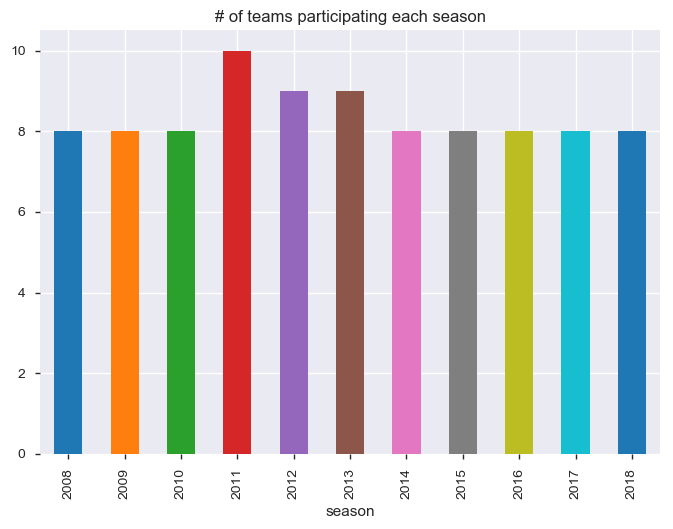

In [19]:
t1 =mdf[['season','team1']].rename(columns={'team1':'team'})
t2 =mdf[['season','team2']].rename(columns={'team2':'team'})
t=t1.append(t2).drop_duplicates().groupby('season')['team'].size().plot.bar()
plt.title("# of teams participating each season")


### Observation : 

- Mostly each session 8 teams particated in 2011 there were 10 teams 


### Summary of all Season with team participating 

- This is useful to see which team participated in which seasons 

Text(0.5, 1.0, 'Teams particpating season over season ')

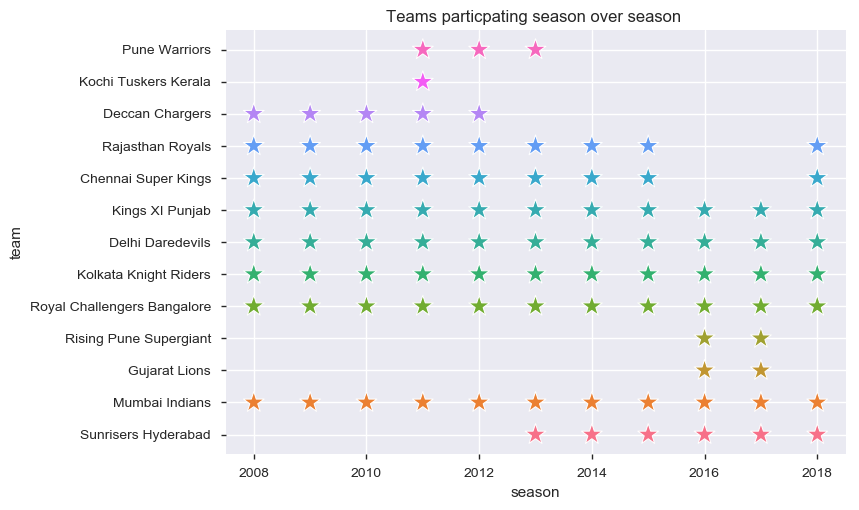

In [20]:
import seaborn as sns
mdft1 =mdf[['season','team1']]
mdft1=mdft1.drop_duplicates()
mdft1.rename(columns={'team1':'team'},inplace=True)
mdft2 =mdf[['season','team2']]
mdft2=mdft2.drop_duplicates()
mdft2.rename(columns={'team2':'team'},inplace=True)
mdft=mdft1
mdft=mdft.append(mdft2)
mdft=mdft.drop_duplicates()
ax = sns.scatterplot(y="team", x="season",data=mdft,hue='team',legend=False,marker='*',s=250)
plt.title("Teams particpating season over season ")

### Observation :
#### - 'Kochi Tuskers kerala'   participated in only one season  .
#### - 'Pune Worriors' ,'Rising Pune Supergiant' and 'Gujarat Lions' participated in least # of seasson (3,2,2 respectively).
#### - 'Rajasthan Royals',Chennai Super Kings' did not participate in 2016,2017 seasson . 


## 6.2 :  Highlight the top 2 team ( Winner and Runner up) each Season .
- This section create a dataframe with limited columns that are Season,Winner  and the # of matches won .
- Then for each session it picks up only 2 top teams that are Winner and Runner-up and shows them as new columns 'Winner-RUP'.


In [21]:
mdffinals =mdf.loc[mdf.groupby("season")["newdate"].idxmax()]  
mdffinals[['season','team1','team2','winner']]
mdffinals['runnersup']=mdffinals.apply(lambda x : x['team2'] if x['winner']==x['team1'] else x['team1']
                                   ,axis=1)
mdffinals[['season','winner','runnersup']]

,season,winner,runnersup
116,2008,Rajasthan Royals,Chennai Super Kings
173,2009,Deccan Chargers,Royal Challengers Bangalore
233,2010,Chennai Super Kings,Mumbai Indians
305,2011,Chennai Super Kings,Royal Challengers Bangalore
379,2012,Kolkata Knight Riders,Chennai Super Kings
455,2013,Mumbai Indians,Chennai Super Kings
515,2014,Kolkata Knight Riders,Kings XI Punjab
572,2015,Mumbai Indians,Chennai Super Kings
632,2016,Sunrisers Hyderabad,Royal Challengers Bangalore
58,2017,Mumbai Indians,Rising Pune Supergiant


## 6.3 :Show the teams that won the most of the seasons  

Text(0.5, 1.0, 'teams winning most of the seasons')

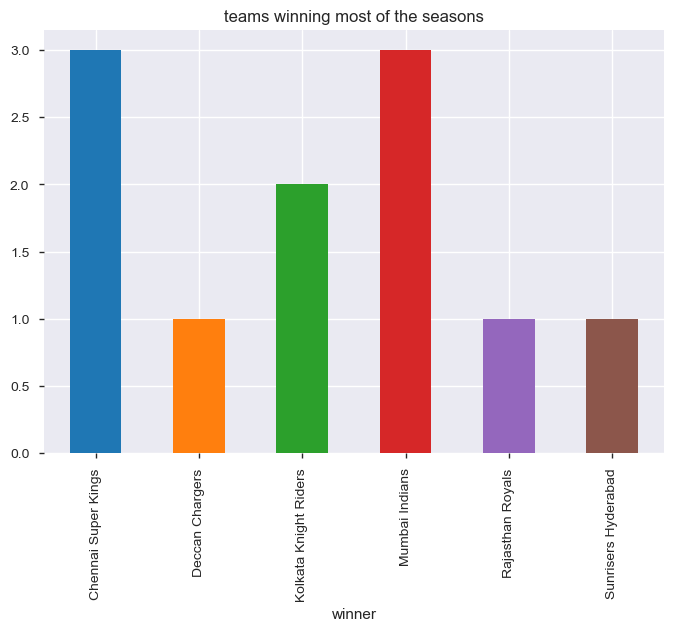

In [75]:
mdffinals.groupby('winner').size().plot.bar()
plt.title("teams winning most of the seasons")

### Observations: 
- "Chennai Super Kings"   won 3 sessions out of 9 seasons they played .
- "Mumbai Indians"   won 3 sessions out of 11 seasons they played .

## 6:4 :  Highligh insight around  # the top 2 & 3 team ( Winner,Runnersup )

- Prepare a data set with Winner and Runner UP columns

In [23]:
# this piece of code crated a dataframe with final 2 teams with theit type 
tempmdf =pd.DataFrame()
tlist =list()
for index, rw in mdffinals.iterrows():
    tlist.append ([rw['season'],rw['winner'],'winner']) 
    tlist.append ([rw['season'],rw['runnersup'],'runnerup'])           
mdfwinnerrup=pd.DataFrame.from_records(tlist)
mdfwinnerrup.rename(columns={mdfwinnerrup.columns[0]:'season',mdfwinnerrup.columns[1]:'team'
                           ,mdfwinnerrup.columns[2]:'Winner-mdfwinnerrup'},inplace=True)
mdfwinnerrup
# total match won by a team when chasing 

,season,team,Winner-mdfwinnerrup
0,2008,Rajasthan Royals,winner
1,2008,Chennai Super Kings,runnerup
2,2009,Deccan Chargers,winner
3,2009,Royal Challengers Bangalore,runnerup
4,2010,Chennai Super Kings,winner
5,2010,Mumbai Indians,runnerup
6,2011,Chennai Super Kings,winner
7,2011,Royal Challengers Bangalore,runnerup
8,2012,Kolkata Knight Riders,winner
9,2012,Chennai Super Kings,runnerup


## 6.4.1 :  All the teams and the number of matches they won each session .

Text(0.5, 1.0, 'Teams and # of matched won by them s')

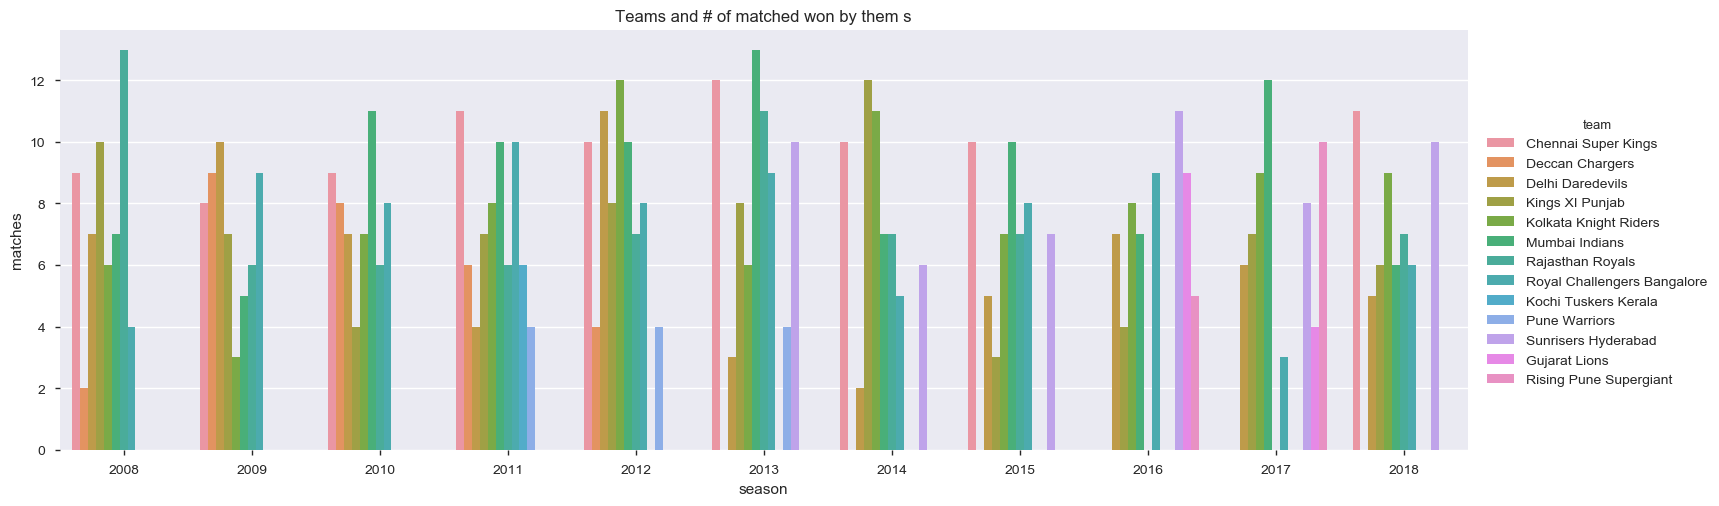

In [24]:
# total match won by a team when chasin
mdf_seasonwinnermatch=mdf.groupby(["season", "winner"]).size().reset_index(name='matches')
mdf_seasonwinnermatch.rename(columns={'winner':'team'},inplace=True)

# plotting a graph with team winning matches each season 
sns.catplot(x="season", y='matches', hue="team" ,data=mdf_seasonwinnermatch,kind='bar',aspect=3)
plt.title("Teams and # of matched won by them s")

##  6.4.2 : Top 3 team in each session ( based on # of matches those won )

Text(0.5, 1.0, 'Top 3 team each season')

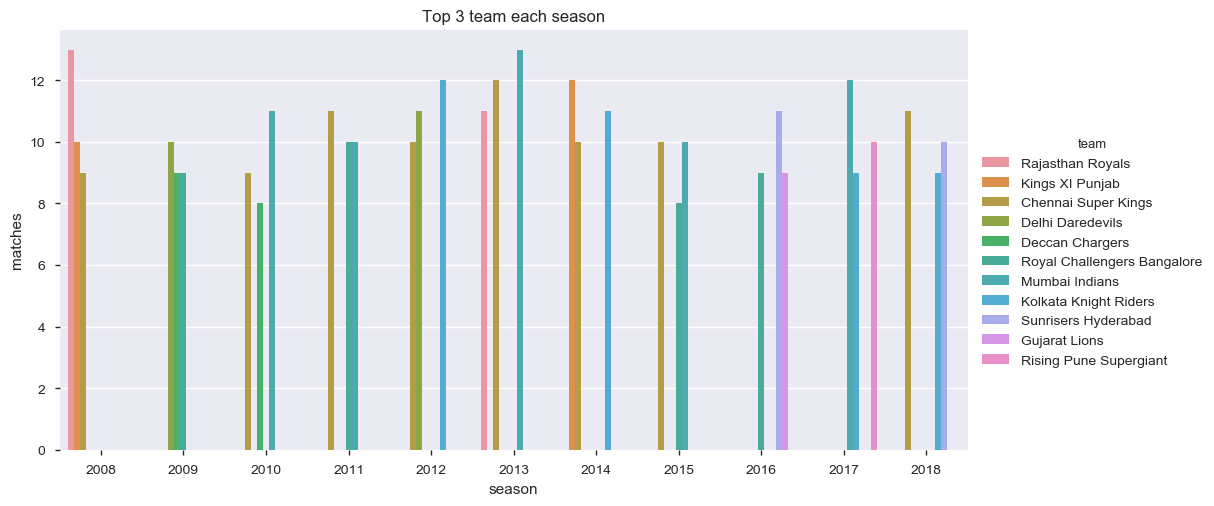

In [25]:
mdf_top3eachsession=pd.DataFrame()

for s in mdf_seasonwinnermatch['season'].unique() :
    tempdf=mdf_seasonwinnermatch[mdf_seasonwinnermatch['season']==s].sort_values('matches',ascending=False)[0:3]
    mdf_top3eachsession=mdf_top3eachsession.append(tempdf)
sns.catplot(x="season", y='matches', hue="team" ,data=mdf_top3eachsession,kind='bar',aspect=2)
plt.title("Top 3 team each season")


## 6.4.3 : Winner and Runners up  with number of matches won by them 

Text(0.5, 1.0, 'Winner and Runners up with # of matches won')

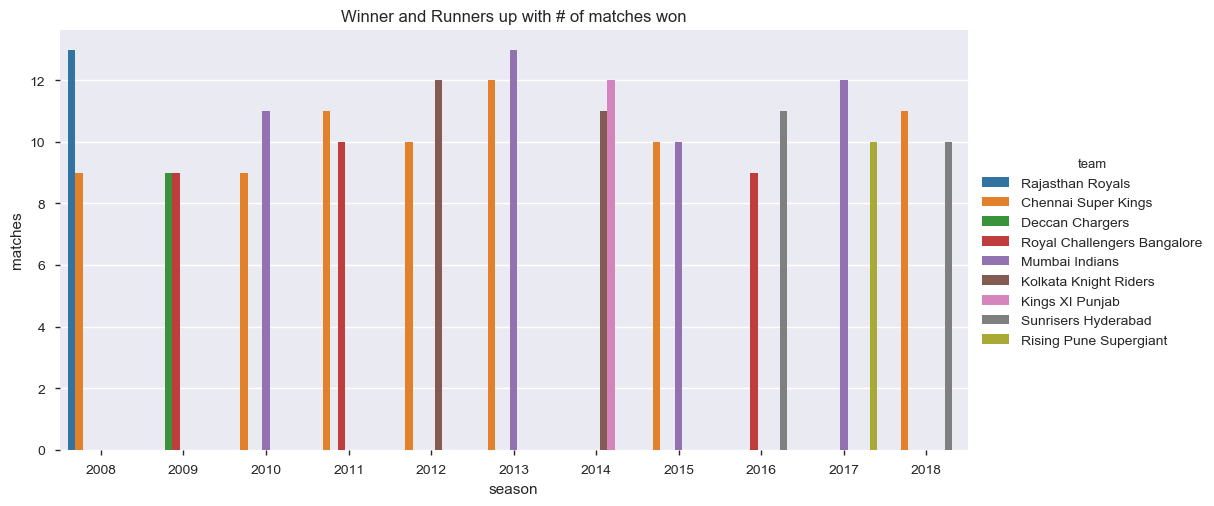

In [26]:
mdfwinnerrupmatch= pd.merge(left=mdfwinnerrup,right=mdf_seasonwinnermatch,on =['season','team'],how='left')
sns.catplot(x="season", y='matches', hue="team" ,data=mdfwinnerrupmatch,kind='bar',aspect=2)
plt.title("Winner and Runners up with # of matches won")


    season                         team Winner-mdfwinnerrup  matches_x  \
0     2008             Rajasthan Royals              winner         13   
1     2008          Chennai Super Kings            runnerup          9   
2     2009              Deccan Chargers              winner          9   
3     2009  Royal Challengers Bangalore            runnerup          9   
4     2010          Chennai Super Kings              winner          9   
5     2010               Mumbai Indians            runnerup         11   
6     2011          Chennai Super Kings              winner         11   
7     2011  Royal Challengers Bangalore            runnerup         10   
8     2012        Kolkata Knight Riders              winner         12   
9     2012          Chennai Super Kings            runnerup         10   
10    2013               Mumbai Indians              winner         13   
11    2013          Chennai Super Kings            runnerup         12   
12    2014        Kolkata Knight Rider

C:\Users\rbanwari\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Winner Runnersup and stat if those team wont the max # of matches ')

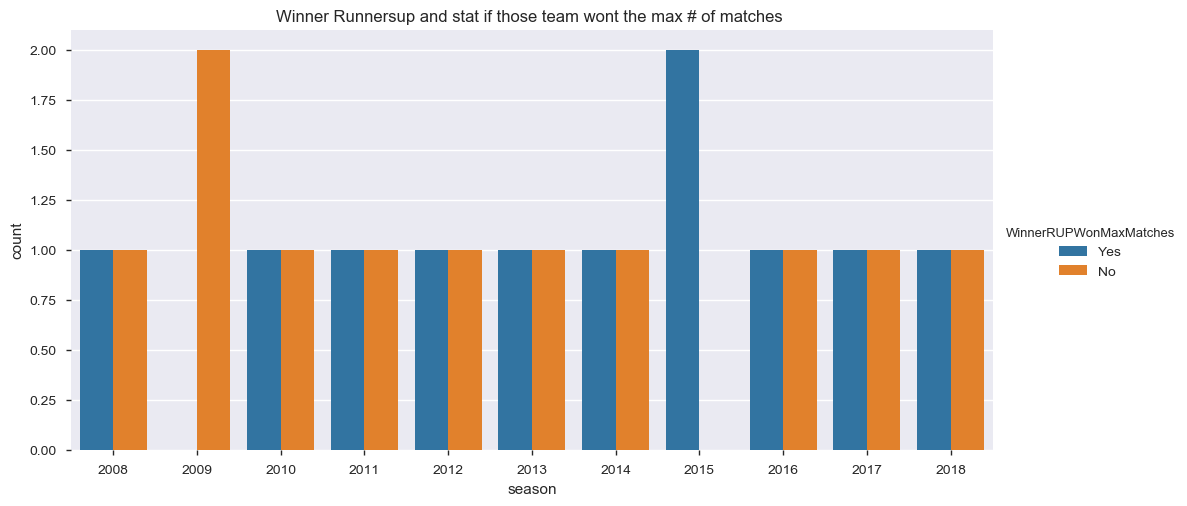

In [79]:
maxmatches =mdf_top3eachsession.groupby ( 'season')['matches'].max().reset_index(name='matches')
tmdf_top3eachsession_withmax=pd.merge(left=mdfwinnerrupmatch,right=maxmatches,on='season',how='left')
print(tmdf_top3eachsession_withmax)
tmdf_top3eachsession_withmax.rename(columns={'matches_x':'matches','matches_y':'maxmatcheswon'},inplace=True)
tmdf_top3eachsession_withmax.reset_index()
#type(tmdf_top3eachsession_withmax)
tmdf_top3eachsession_withmax['WinnerRUPWonMaxMatches']=tmdf_top3eachsession_withmax.apply(
    lambda x: 'Yes' if x['matches']==x['maxmatcheswon'] else 'No',axis=1)
sns.factorplot('season', data=tmdf_top3eachsession_withmax, hue='WinnerRUPWonMaxMatches', kind='count',aspect=2)
plt.title("Winner Runnersup and stat if those team wont the max # of matches ")
#print(tmdf_top3eachsession_withmax[['season', 'Winner-RUP', 'matches','maxmatcheswon', 'WinnerRUPWonMaxMatches']])

### Observation : 
- We can notice in season 2009 , Winner and RunnersUP did not win the max # of matches , it was some other team .
- We can notice in season 210 , Winner and RunnersUP both won the max # of matches 
###  This indicates that  # of matches won doesn't count of being a series Winner/Runnesup 

## 6.5 : Top 3 teams that won when chasing a score 

Text(0.5, 1.0, 'Top 3 teams that won chasing a score ')

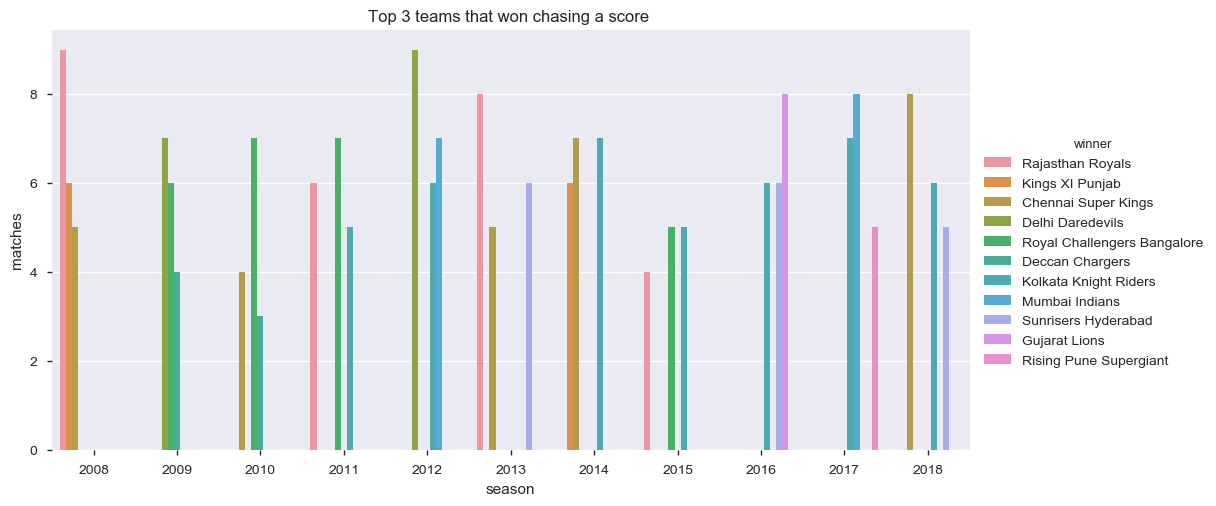

In [84]:
# get the team and # of match they won when chasing 
mdf_chasingwinners=pd.DataFrame()
mdf_chasingwinners=mdf_chasingwinners.append(mdf[(mdf['toss_decision']=='bat' ) & (mdf['winner']!=mdf['toss_winner'])]) # team batting first lost the match
mdf_chasingwinners=mdf_chasingwinners.append(mdf[(mdf['toss_decision']=='field' ) & (mdf['winner']==mdf['toss_winner'])])# team feiling first won the match
mdf_chasingwinners=mdf_chasingwinners.groupby(["season", "winner"]).size().reset_index(name='matches')# total match won by a team when chasing 

mdf_chasingwinners3 =pd.DataFrame()
for s in mdf_chasingwinners['season'].unique() :
    tempdf=mdf_chasingwinners[mdf_chasingwinners['season']==s].sort_values('matches',ascending=False)[0:3]
    mdf_chasingwinners3=mdf_chasingwinners3.append(tempdf)
    
sns.catplot(x="season", y='matches', hue="winner" ,data=mdf_chasingwinners3,kind='bar',aspect=2)
plt.title("Top 3 teams that won chasing a score ")

Text(0.5, 1.0, 'All team winnig matched when chasing ')

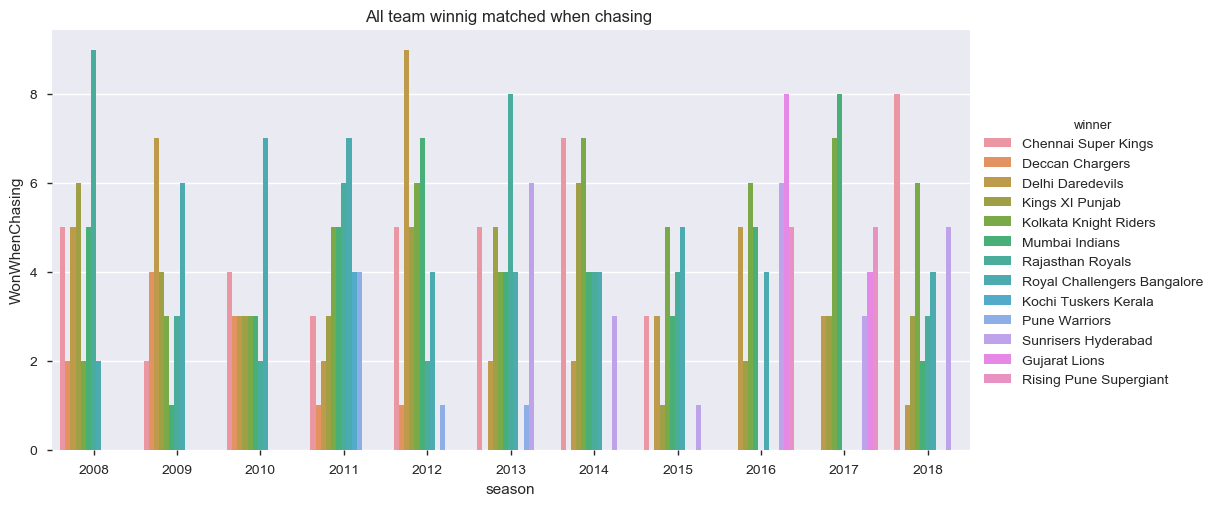

In [85]:

mdf7=pd.merge(left=mdf_chasingwinners,right=mdf_seasonwinnermatch,left_on=['season','winner'],right_on=['season','team'],how='left')
mdf7.rename(columns={'matches_y':'TotalMatchesWon','matches_x':'WonWhenChasing'},inplace=True)
sns.catplot(x="season", y='WonWhenChasing', hue="winner", data=mdf7,kind='bar',aspect=2)
plt.title("All team winnig matched when chasing ")

## 6.6 :Summary on  Matches won versus Matches won when chasing a score for all seasons

Text(0.5, 1.0, 'Matches won by team when chasing a score s')

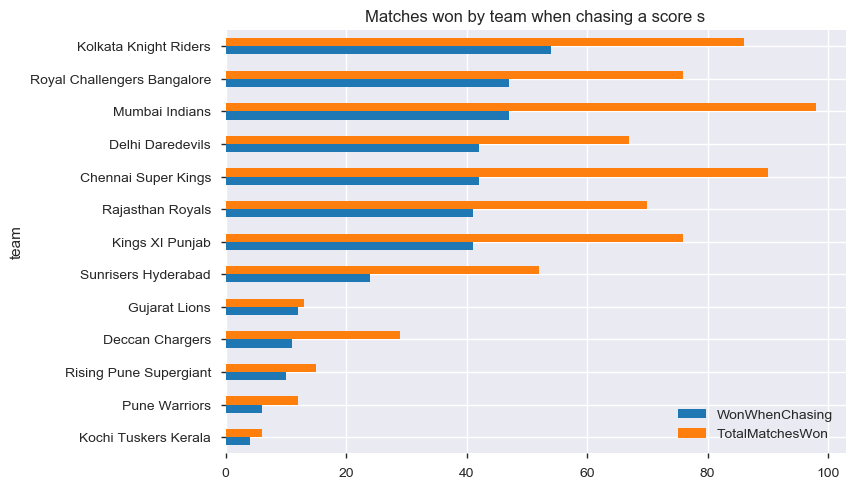

In [86]:
mdf8=mdf7.groupby('winner',as_index=False)['TotalMatchesWon','WonWhenChasing'].sum()
mdf8.rename(columns={'winner':'team'},inplace=True)
mdf8.sort_values(by='WonWhenChasing',ascending=True).plot(kind='barh',x='team',y=['WonWhenChasing','TotalMatchesWon'])
plt.title("Matches won by team when chasing a score s")

## 6.7 : Teams wise summary on % of  Matches won versus Matches won when chasing (above 20) a score for all seasons

Text(0.5, 1.0, '% of wins when chasing a score ')

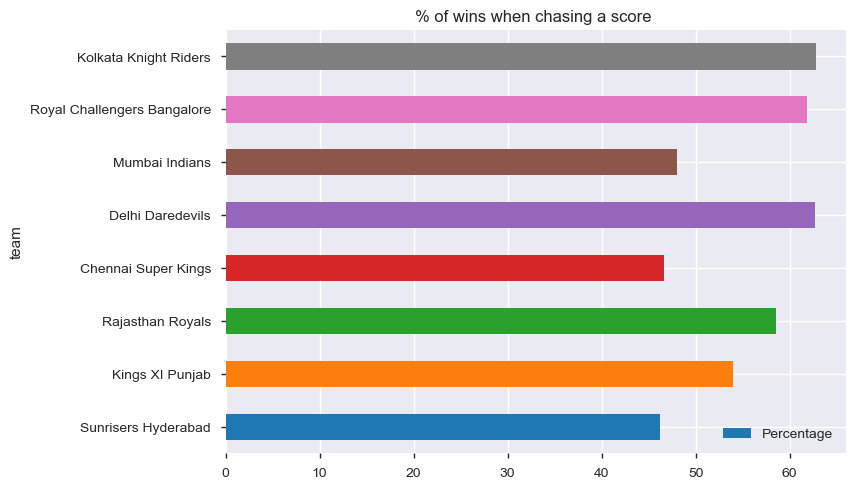

In [90]:
mdf8['Percentage']=mdf8['WonWhenChasing']/mdf8['TotalMatchesWon']*100
mdf8[mdf8['WonWhenChasing']>20].sort_values(by='WonWhenChasing',ascending=True).plot(kind='barh',x='team',y='Percentage')
plt.title("% of wins when chasing a score ")

##  6.8 : Top players ( by Man of the Match )

     season           player  matches
28     2008         SE Marsh        5
80     2009        YK Pathan        3
121    2010     SR Tendulkar        4
133    2011         CH Gayle        6
188    2012         CH Gayle        5
253    2013       MEK Hussey        5
285    2014       GJ Maxwell        4
319    2015        DA Warner        4
386    2016          V Kohli        5
419    2017  NM Coulter-Nile        3
463    2018      Rashid Khan        4


Text(0.5, 1.0, 'The top most player winning Man of Match title each season')

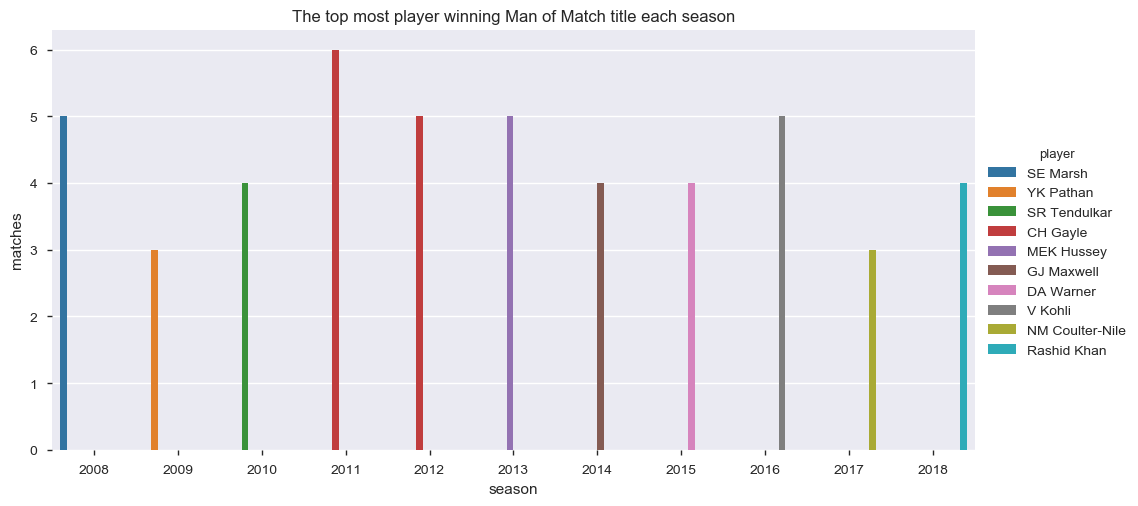

In [91]:
mdf4=mdf.groupby(["season", "player_of_match"]).size().reset_index(name='matches')
mdf4=mdf4.rename(columns={'player_of_match':'player'})

mdf5=pd.DataFrame()
for s in mdf4['season'].unique() :    
    mdft1=mdf4[mdf4['season']==s].sort_values('matches',ascending=False)[0:1]
    mdf5=mdf5.append(mdft1)
print(mdf5)

sns.catplot(x='season',y='matches' ,hue='player',kind='bar', data=mdf5,aspect=2)
plt.title("The top most player winning Man of Match title each season")

### Observation :
### - For CH Gaye Season 2011 and 2012 were good and he was awarded Player of the match during this 2 seaasons the most 

## 6.9 : Relationship betwen winning a toss and winning  the match .

                             TotalWonTosses  WonToss&Match  Percentage
toss_winner                                                           
Chennai Super Kings                      77             50   64.935065
Deccan Chargers                          43             19   44.186047
Delhi Daredevils                         79             35   44.303797
Gujarat Lions                            15             10   66.666667
Kings XI Punjab                          75             32   42.666667
Kochi Tuskers Kerala                      8              4   50.000000
Kolkata Knight Riders                    87             49   56.321839
Mumbai Indians                           90             50   55.555556
Pune Warriors                            20              3   15.000000
Rajasthan Royals                         68             37   54.411765
Rising Pune Supergiant                   13              8   61.538462
Royal Challengers Bangalore              76             39   51.315789
Sunris

Text(0.5, 1.0, 'Team Winning The toss and Percentages of them converting that to a match Win')

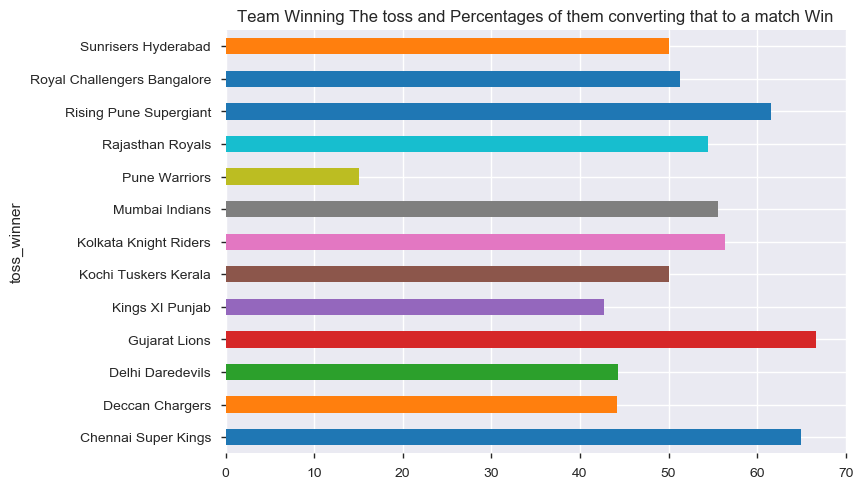

In [33]:

# add a column which indicates the toss winner is the winner of the match 
mdf['TossWinnerIsWinner']=  mdf.apply( lambda x : 1 if x['toss_winner']==x['winner'] else 0 ,axis=1)
# temporaty processig on Master DataFrame 
mdft1=mdf.groupby('toss_winner',as_index=False)['TossWinnerIsWinner'].agg(['count','sum'])
mdft1.rename (columns={'toss_winner':'team','count':'TotalWonTosses','sum':'WonToss&Match'},inplace=True)
mdft1['Percentage']=mdft1.apply(lambda x: int(x['WonToss&Match'])/int(x['TotalWonTosses'])*100,axis=1)
print(mdft1) 
mdft1.plot(kind='barh',y='Percentage',legend=False)
plt.title("Team Winning The toss and Percentages of them converting that to a match Win")

### Observation : 
- NO team could convert a Toss with to Match Win more than 67 % 
### - This doesn't indicate signifacantly that winnig a toss can help in winning the match .

## 6.10 :  Relationship between a Venue ( City/Ground) to see any Home Advantage  

### The following peice of code shows team that won on a specific ground for more than 5 times.

                          winner        city  MatchesWon
119        Kolkata Knight Riders     Kolkata          42
142               Mumbai Indians      Mumbai          37
5            Chennai Super Kings     Chennai          34
185  Royal Challengers Bangalore   Bangalore          30
167             Rajasthan Royals      Jaipur          29
48              Delhi Daredevils       Delhi          27
216          Sunrisers Hyderabad   Hyderabad          25
82               Kings XI Punjab  Chandigarh          18
139               Mumbai Indians     Kolkata          10
128               Mumbai Indians   Bangalore           8
18           Chennai Super Kings      Mumbai           7
157             Rajasthan Royals   Ahmedabad           7
107        Kolkata Knight Riders   Bangalore           6
192  Royal Challengers Bangalore       Delhi           6
140               Mumbai Indians      Mumbai           6


Text(0.5, 1.0, 'Relationship with a City/Venue and the team belonging to that City winnig there most')

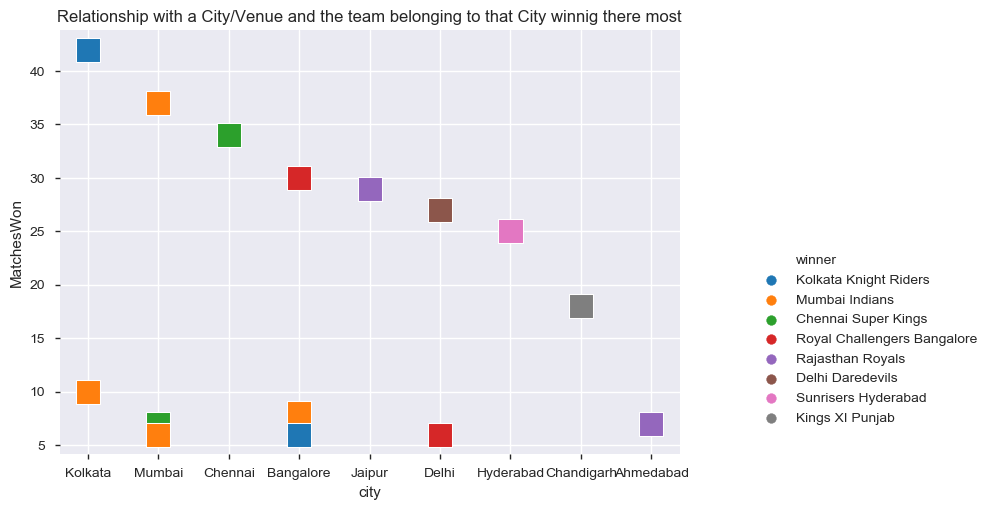

In [112]:
mdfWV=mdf.groupby(["winner", "city","venue"]).size().reset_index(name='MatchesWon').sort_values('MatchesWon',ascending =False)
mdfWV2=mdfWV[mdfWV['MatchesWon']>5] 
#sns.lineplot(x="venue", y="MatchesWon",hue='winner' ,data=mdfWV2)
print(mdfWV2[["winner", "city","MatchesWon"]])
s1=sns.scatterplot(x="city", y="MatchesWon",hue='winner' ,data=mdfWV2,marker='s',s=300)
plt.legend(loc='best', bbox_to_anchor=(1.5, 0.5))
plt.title("Relationship with a City/Venue and the team belonging to that City winnig there most")


### Observation :

#### From the DataSet derived and the plotting between Venue City and the Winner team indicates that there is good correlation
#### The above representation denotes that the Team in its own home ground(s) has been winning the most .

## 6.11 : Highlight  bowler related insight  
- Such as # of over,total runs given , total wickets taken ,distribution etc 
- Fix column Over as it get # of deliveries,  Devide it by 6 to get over .
- Create a field eco_rat ,to show how economoic a bowler is per over .s

In [35]:
bowler_seaid=bowler.groupby(['season','match_id','bowler'],as_index=False).agg({'over':'size','total_runs':'sum','dismissals':'sum'})
#print(bowler_seaid[['season','match_id','dismissals','over','total_runs']].head())
bowler_seaid['over']=bowler_seaid.apply( lambda x : int(x['over']/6) ,axis=1)
bowler_seaid['eco_rate']=bowler_seaid.apply( lambda x : x['total_runs']/x['over'] if x['over']>0 else 0 ,axis=1)


- For each sesson only pick up top 5 bowler based on # of Wicket Taken , # of Over bowled and # of runs given .
- Store the aggreated subdata set for all 3 category that are eco_rate,total_runs,total_over for each Season separately 


In [36]:
bowler_s=bowler_seaid.groupby(['season','bowler'],as_index=False).agg({'over':'sum','total_runs':'sum','dismissals':'sum','eco_rate':'mean'})
bowler_only=bowler_seaid.groupby('bowler',as_index=False).agg({'over':'sum','total_runs':'sum','dismissals':'sum','eco_rate':'mean'})


bowlereco= pd.DataFrame()
bowlerruns= pd.DataFrame()
bowlerdis= pd.DataFrame()
for s in bowler_s['season'].unique():
    bowlereco=bowlereco.append(bowler_s[bowler_s['season']==s].sort_values(['over','eco_rate'],ascending=[False,False])[0:3])
    bowleredis=bowlerdis.append(bowler_s[bowler_s['season']==s].sort_values(['dismissals'],ascending=False)[0:3])
    bowlereruns=bowlerruns.append(bowler_s[bowler_s['season']==s].sort_values(['over','total_runs'],ascending=[False,True])[0:3])

    
   

### 6.11.1 : Distribution of over Economy run rate of bowlers 

C:\Users\rbanwari\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


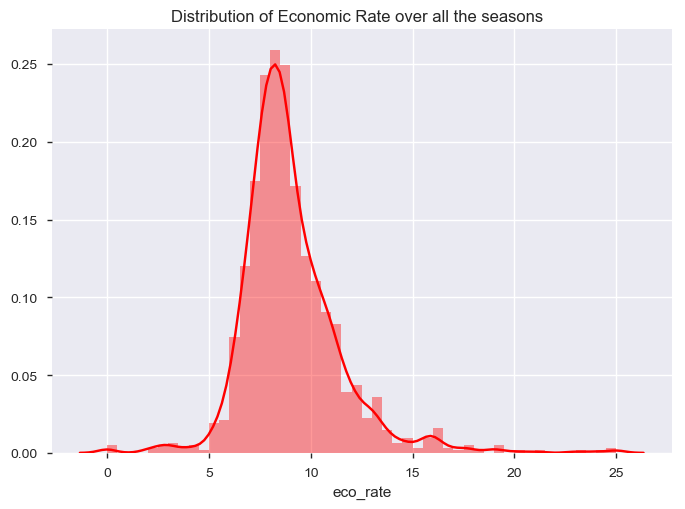

In [37]:
sns.distplot(bowler_s['eco_rate'],color ='r')
plt.title('Distribution of Economic Rate over all the seasons  ')
plt.show()

Text(0.5, 1.0, 'Distribution of Economic Rate over all the seasons - another views ')

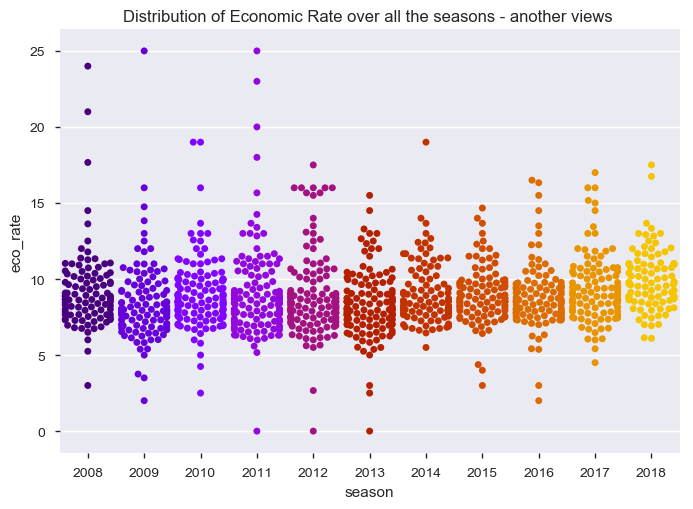

In [38]:
sns.swarmplot(x='season', y='eco_rate', palette='gnuplot', data=bowler_s)
plt.title('Distribution of Economic Rate over all the seasons - another views ')

### Observation ;
- Economy rate seems to be mostly between 6 and 12 looking at the above 2 graphs s

#### Check the the Economy Run Rate Medians over each session

Text(0.5, 1.0, 'Average of Eco Rate each season ')

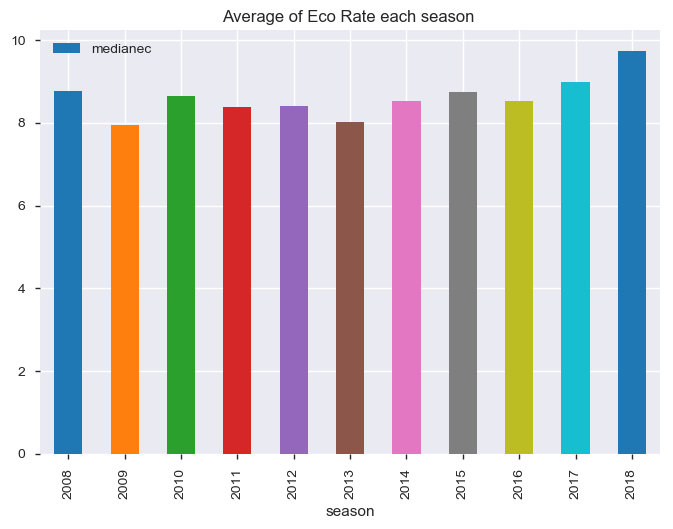

In [39]:
medecorate =bowler_s.groupby('season')['eco_rate'].median().reset_index(name='medianec')
medecorate.plot.bar(x='season',y='medianec')
plt.title('Average of Eco Rate each season ')

Text(0.5, 1.0, 'Over all Average Economic Rate')

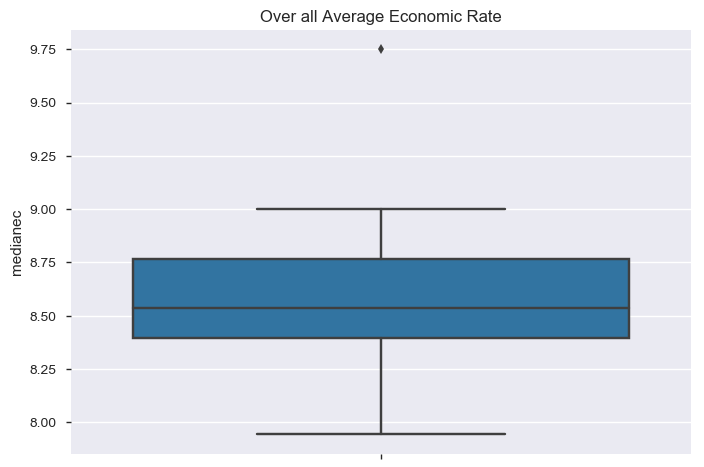

In [41]:
#sns.distplot(medecorate['medianec'],color ='r')

sns.boxplot(y="medianec",  data=medecorate)

plt.title("Over all Average Economic Rate" )


### Observation : 
- Above 2 graphs on Medians show us that the range is wide however for Economy Run rate for bowlers however mostly between 7 -8 however the median of these median is 8.6 

### 6.11.2 :  Distribution over Runs given by bowlers  

-  Distribution of # of runs given each session

Text(0.5, 1.0, 'Distribution of runs given by bowler each season')

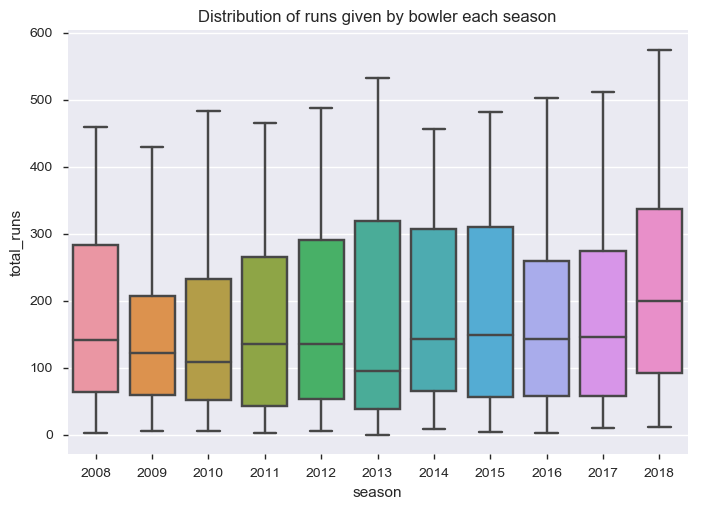

In [42]:
sns.boxplot(x="season", y="total_runs",  data=bowler_s)
plt.title('Distribution of runs given by bowler each season')

### Observation:
- The range varies and is as high as ~ 600 .
- The total_runs given however are cnetered around a range between 100 to 300 .
- Need to dig more and see what the median to the average runs for a bowler s

### 6.11.3 : Median of runs given each session

Text(0.5, 1.0, 'Average runs given each session by a bowler')

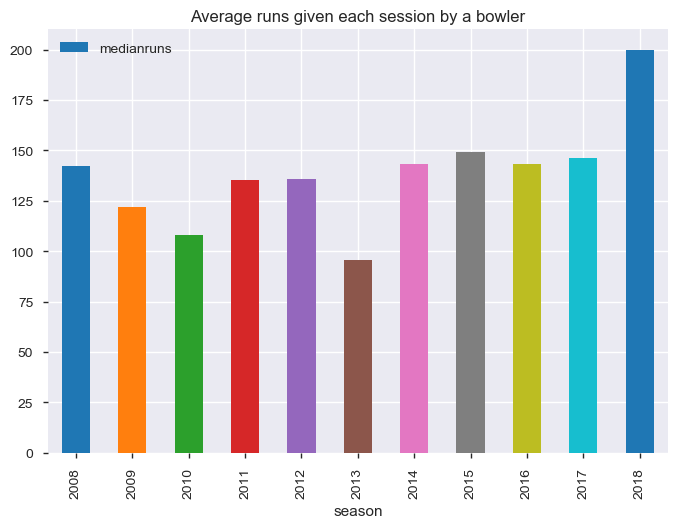

In [43]:
medruns =bowler_s.groupby('season')['total_runs'].median().reset_index(name='medianruns')
medruns.plot.bar(x='season',y='medianruns')
plt.title('Average runs given each session by a bowler')

Text(0.5, 1.0, 'Distribution of average runs given each session by a bowler')

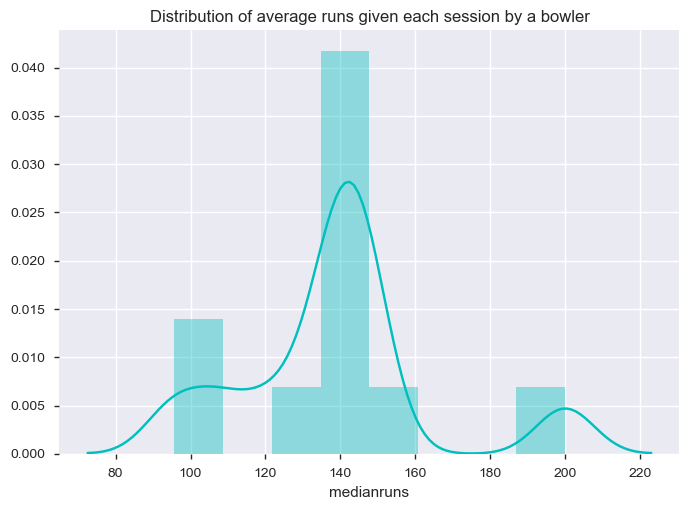

In [44]:
sns.distplot(medruns['medianruns'],color ='C')
plt.title('Distribution of average runs given each session by a bowler')

### Observation :
- The above 2 graphs on median runs given each session , we can notice that the average run given by a bowler rangess between 100 to 200 
####  - However its mostly centered around 130-150 Runs each sessions .

#### Plot a graph show the top 5 most economic bowler each session 
- This is taken for the bowler with most # of over and least runs give ( ie best Eco Rate )

### 6.11.4: Distribution over wicket taken by bowlers    

Text(0.5, 1.0, 'Distribution of wickets taken by bowlers')

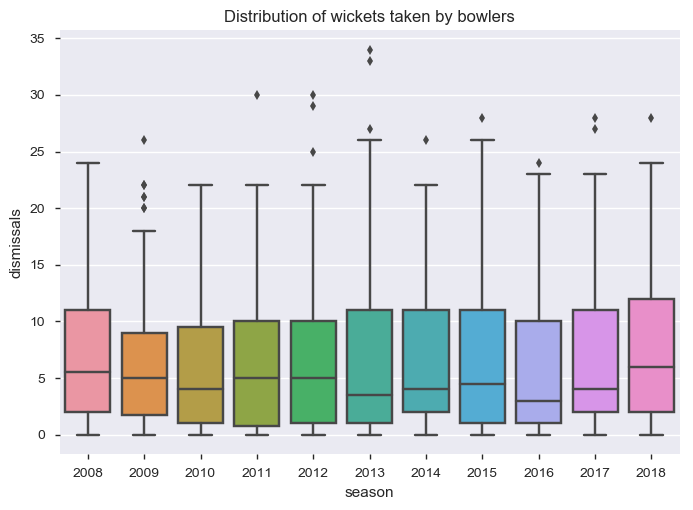

In [46]:
sns.boxplot(x="season", y="dismissals",  data=bowler_s)
plt.title('Distribution of wickets taken by bowlers')

### Observation :
- The average wicket taken by bowler is around 6 Wicket each session
#### - There are bowlers however who have taken more than 20 wicket a session and as high as 34

In [47]:
best_bowlers =bowler_s[bowler_s['dismissals']>20].groupby(['season','bowler']).agg({'dismissals':'sum'}).reset_index()

bestb_g =best_bowlers.groupby('bowler').agg({'dismissals':'sum','season':'count'}).reset_index()
bestb_g=bestb_g.sort_values(by=['dismissals','season'],ascending =[False,False])


### 6.11.5 :Most Consistent bowlers
- Most # of wicket taken
- Most # of wicket taken in more than 1 season


#### *** Most # of wicket here indicate wickets more than 30 



In [48]:
bestb_g=bestb_g[bestb_g['season']>1]
# add economy run rate for these bewlers :   
bestb_g = pd.merge (left=bestb_g,right=bowler_only,on ='bowler',how='left')
bestb_g

,bowler,dismissals_x,season,over,total_runs,dismissals_y,eco_rate
0,SL Malinga,125,5,424,3034,170,7.122879
1,SP Narine,77,3,382,2569,126,6.741924
2,B Kumar,73,3,373,2779,127,7.709967
3,DJ Bravo,62,2,388,3375,155,8.724090
4,R Vinay Kumar,48,2,351,3043,127,8.739744
5,A Nehra,47,2,316,2537,121,8.051136
6,MM Sharma,47,2,281,2430,98,8.775794
7,PP Ojha,43,2,314,2399,99,7.898148
8,YS Chahal,43,2,244,1976,81,8.356618


Text(0.5, 1.0, 'Bowlers that took more than 20 wicket in # of season')

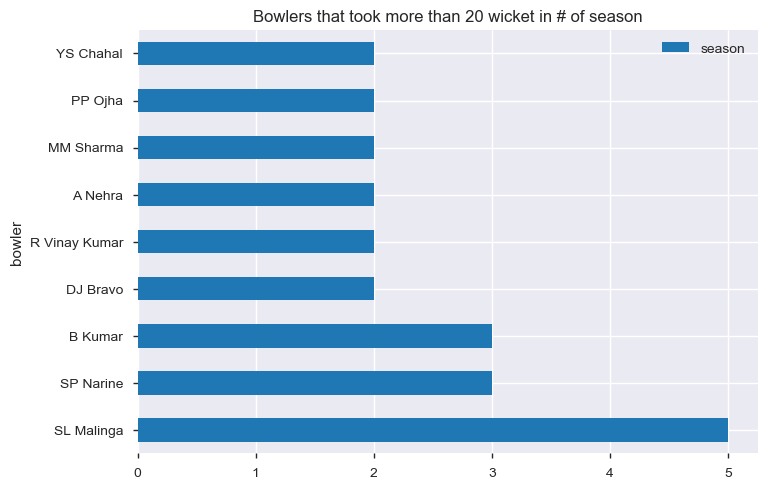

In [49]:
bestb_g[['bowler','season']].plot(kind='barh',x='bowler')
plt.title("Bowlers that took more than 20 wicket in # of season")

Text(0.5, 1.0, 'The bowler with more than 20 wicket in a season with their Economy Run Rate ')

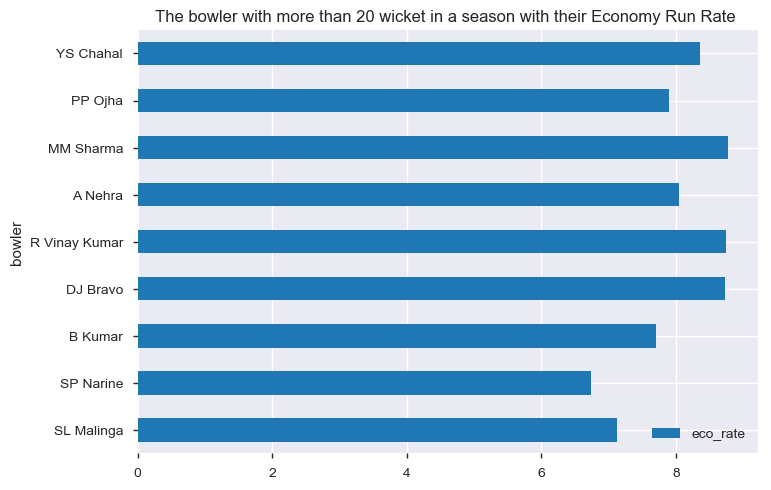

In [50]:
bestb_g
bestb_g[['bowler','eco_rate']].plot(kind='barh',x='bowler')
plt.title("The bowler with more than 20 wicket in a season with their Economy Run Rate ")

In [51]:
print (bestb_g['eco_rate'].median ())

8.051136363636362


### Observation :


#### - SL Maling ,SP Narine  and B Kumar have been the most consistent bowlers as they have take more than 20 wickets for 3/more season .  SLs Malinga being the best bewler in this category .

##### - The Economy run rate for these top bowlers varies from 6.5 to 8.5 
##### - The average   economy run rate is : 8  

### 6.11.6 :  Least Economic Bowler  

#### Following show the top 10 bowler where their economy run rate is above 10 and they gave more runs and took less wickets. 

In [52]:
t1=bowler_only[bowler_only['eco_rate']>10].sort_values(['over','eco_rate','dismissals'],ascending=[False,False,True])[0:10]
t1

,bowler,over,total_runs,dismissals,eco_rate
103,DR Smith,89,825,27,10.284420
65,Basil Thampi,53,545,20,10.031250
251,Pankaj Singh,50,472,11,10.078431
73,CJ Anderson,49,532,14,10.712121
7,A Mithun,48,477,8,10.442708
217,MP Stoinis,44,436,14,10.319444
155,Joginder Sharma,42,421,13,10.311111
141,JDP Oram,39,362,13,10.297619
371,Y Venugopal Rao,36,338,7,10.154167
177,Karanveer Singh,34,323,14,10.111111


#### Following gives you an obserview of the top 10 bowler that were expensive that is they gave more runs by bowling less over and yeiled  less wickets 

In [53]:
t2=bowler_only.sort_values(['total_runs','dismissals','over'],ascending=[False,True,True])[0:10]
t2

,bowler,over,total_runs,dismissals,eco_rate
248,PP Chawla,474,3742,146,8.372960
120,Harbhajan Singh,517,3725,143,7.457192
6,A Mishra,476,3576,155,7.717525
91,DJ Bravo,388,3375,155,8.724090
237,P Kumar,418,3342,102,8.205182
354,UT Yadav,376,3249,127,8.832399
263,R Vinay Kumar,351,3043,127,8.739744
315,SL Malinga,424,3034,170,7.122879
253,R Ashwin,431,2975,121,7.275956
264,RA Jadeja,359,2865,101,8.464286


## 6.12 : Highlight batsman related insights

- Following Set of Code lines will parepare necessary data set related to Batsman performance over a season/match 
- Merge the Delivery DataFrame with March_Season data set to pull season in Delivery Data frame using Join
- create subset of batsman specific groupping on season ,(season,match) or just a batsman level .
- Add a few new field like StrikeRunRate or RunRate (runs/match) for a batsman .


In [54]:
ddf.columns
batsman=pd.DataFrame()

In [94]:
batsman =pd.merge(left=ddf,right=matchidseason,left_on='match_id',right_on='id',how='left')     
batsman.dropna(subset=['season'], inplace = True)
batsman['season']=batsman.apply( lambda x :int(x['season']) ,axis=1)
batsman['dismissed']=batsman.apply( lambda x :1 if x['player_dismissed']==x['batsman'] else 0 ,axis=1)


In [95]:
batsman_seaid= batsman.groupby(['season','match_id','batsman'],as_index=False).agg({'batsman_runs':'sum'} )
batsman_sea= batsman.groupby(['season','batsman'],as_index=False).agg({'batsman_runs':'sum'} )
batsman_only=batsman.groupby('batsman',as_index=False).agg({'season':'nunique','match_id':'nunique','batsman_runs':'sum','ball':'count','dismissed':'sum'})

In [96]:
batsman_only['strikerunrate']=batsman_only.apply(lambda x: int(x['batsman_runs'])/int(x['ball'])*100,axis=1)
batsman_only['runrate']=batsman_only.apply(lambda x : int(x['batsman_runs'])/int(x['match_id']),axis=1 )

In [58]:
batsman_only.head(2)

,batsman,season,match_id,batsman_runs,ball,dismissed,strikerunrate,runrate
0,A Ashish Reddy,4,23,280,196,15,142.857143,12.173913
1,A Chandila,2,2,4,7,0,57.142857,2.000000


### 6.12.1 : Show us  how many runs were scored each sessions by a batsman


Text(0.5, 1.0, 'Distribution of run scored by each batsman each season ')

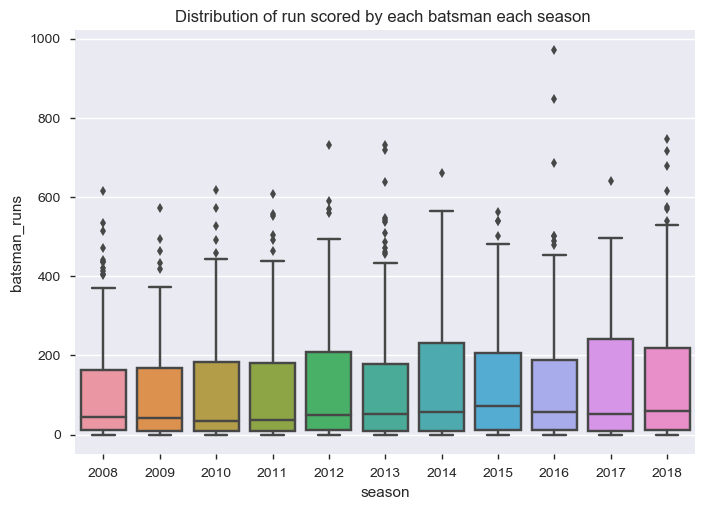

In [97]:
sns.boxplot(x="season", y="batsman_runs",  data=batsman_sea)
plt.title("Distribution of run scored by each batsman each season ")

## Obsevation :
### -  We can notice that each season batsn scored mostly under 300 total in season
### - however there are batsmen who scored  more than 400 and as high as 900 +   

Text(0.5, 1.0, 'Distribution of runs scored >600 each season ')

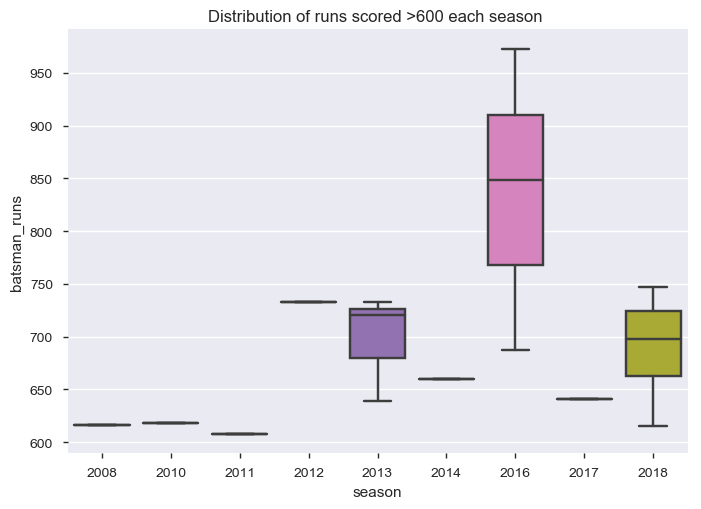

In [116]:
sns.boxplot(x="season", y="batsman_runs",  data=batsman_sea[batsman_sea['batsman_runs']>600])
plt.title("Distribution of runs scored >600 each season ")

###  6.12.2 : Who is the most scroing batsman .

- Season 2016 seems to be most favourable for batsman as it has the highest #of runs scored by a batsman in a series .

In [103]:
top_batsman=batsman_sea[batsman_sea['batsman_runs']>600].sort_values('batsman_runs',ascending=False).reset_index()


In [104]:
top_batsman['bucket']=top_batsman.apply(lambda x: int(x['batsman_runs']/100)*100 ,axis=1) 
top_batsman.head(5)

,index,season,batsman,batsman_runs,bucket
0,1383,2016,V Kohli,973,900
1,1278,2016,DA Warner,848,800
2,1595,2018,KS Williamson,747,700
3,684,2012,CH Gayle,733,700
4,910,2013,MEK Hussey,733,700


Text(0.5, 1.0, 'Batsman and # of time they scored in a run bucket > 500 runs each session ')

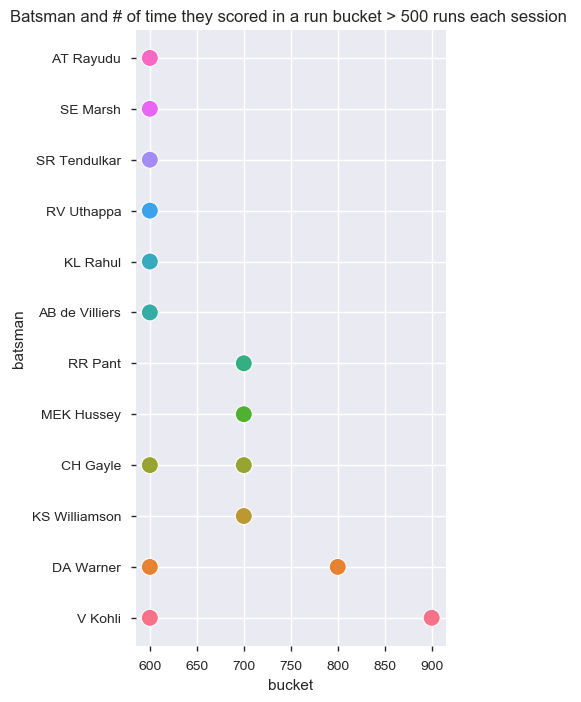

In [105]:
plt.figure(figsize=(4,8))
sns.scatterplot(y="batsman", x="bucket",data=top_batsman,hue='batsman',legend=False,marker='o',s=150)
plt.title("Batsman and # of time they scored in a run bucket > 500 runs each session ")

Text(0.5, 1.0, 'Batsman and # of time they scored in a run bucket above 600 runs each session ')

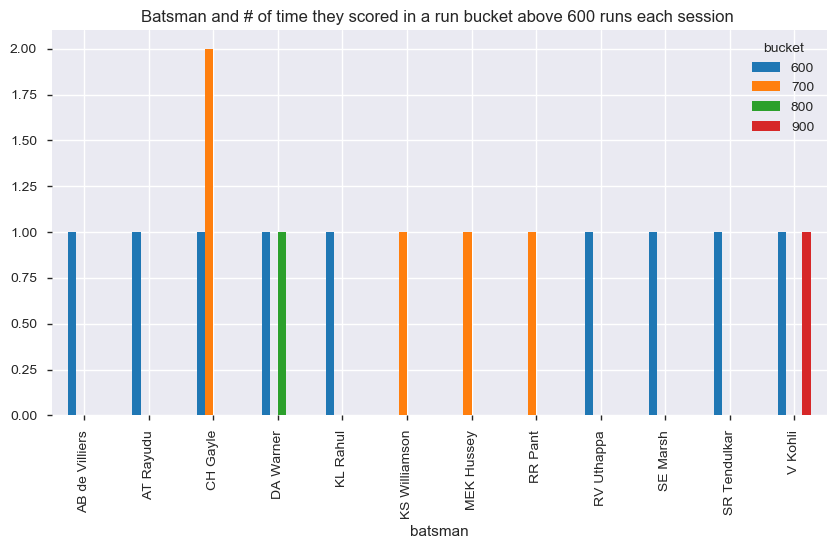

In [109]:
rl =pd.crosstab( top_batsman.batsman, top_batsman.bucket )
rl.plot.bar(figsize=(10,5))

plt.title("Batsman and # of time they scored in a run bucket above 600 runs each session ")

### Observation

### The above shows V Kohli scroed 500-600 runs in 3 series , 600 in one and 900+ in one series .

## 6.13 : The most # of boundaries in all season .

####  Following block groups # of 4s and 6's and store in dataframe

In [65]:
batsman_boundary=batsman[( batsman['batsman_runs']== 4 ) | ( batsman['batsman_runs']== 6)].groupby(['season','batsman_runs','batsman']).size().reset_index(name='bcount')
batsman_boundary=batsman_boundary.sort_values('bcount',ascending=False)
batsman_boundary.rename(columns={'batsman_runs':'boundarytype'},inplace=True)

In [66]:
t4s =pd.DataFrame()
t6s  =pd.DataFrame()

#t4s =batsman_boundary.loc[batsman_boundary.groupby("boundarytype")["bcount"].idxmax()]  


for s in batsman_boundary['season'].unique():
    t1=batsman_boundary[(batsman_boundary['boundarytype']==4) & (batsman_boundary['season']==s)].sort_values('bcount',ascending =False)[0:2]
    t4s=t4s.append(t1)
    
    t2=batsman_boundary[(batsman_boundary['boundarytype']==6) & (batsman_boundary['season']==s)].sort_values('bcount',ascending =False)[0:2]
    t6s=t6s.append(t2)
    

###  6.13.1 : Most # of 4s  ( above 70 )

In [67]:
t4s[t4s['bcount']>70].sort_values('bcount',ascending =False)[0:5]


,season,boundarytype,batsman,bcount
1696,2016,4,DA Warner,88
512,2010,4,SR Tendulkar,86
1776,2016,4,V Kohli,84
1154,2013,4,MEK Hussey,81
1380,2014,4,RV Uthappa,74


Text(0.5, 1.0, "Top most batsman with maximum # of Boundary '4s above 70' each season")

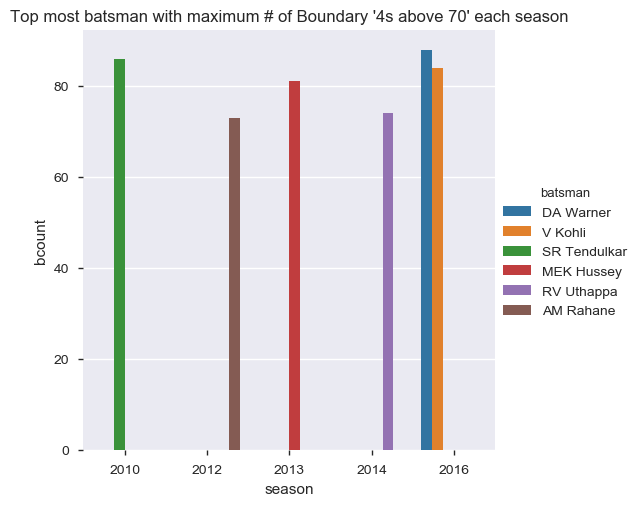

In [115]:
sns.catplot(x="season", y='bcount', hue="batsman" ,data=t4s[t4s['bcount']>70],kind='bar',aspect=1)
plt.title("Top most batsman with maximum # of Boundary '4s above 70' each season")

## Observation 

- We can see the  DA Warning , SR Tendulkar and V Kohli are the batsmen with the most # of 4s .

### 6.13.2 :  Most # of 6s (above 35)

In [69]:
t6s[t6s['bcount']>35].sort_values('bcount',ascending =False)[0:5]


,season,boundarytype,batsman,bcount
1003,2012,6,CH Gayle,59
1226,2013,6,CH Gayle,52
771,2011,6,CH Gayle,44
1870,2016,6,V Kohli,38
1782,2016,6,AB de Villiers,37


Text(0.5, 1.0, "Top most batsman with maximum # of Boundary '6s above 35' each season")

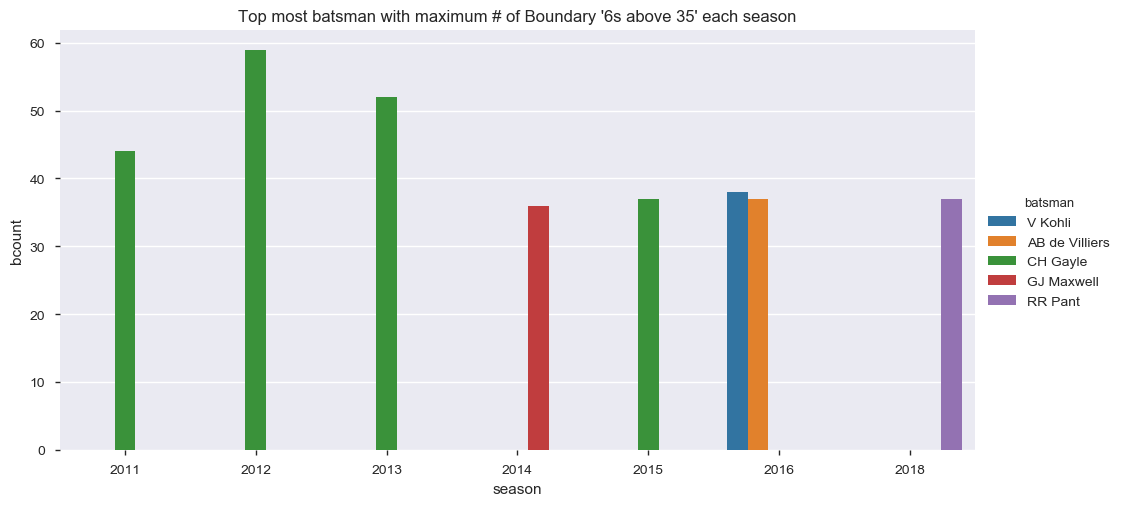

In [114]:
sns.catplot(x="season", y='bcount', hue="batsman" ,data=t6s[t6s['bcount']>35],kind='bar',aspect=2           )
plt.title("Top most batsman with maximum # of Boundary '6s above 35' each season")

### Observation 

- We can see the CH Gaye has been constantly been on the top list of sixes hit for 4 season .

# 7: Conclusion :


### -  A team playing at its  home city has a home advantage and more chaces to win the match there.
### -  V Kohli is the most consistent batsman over all the seasson.
### -  SL Malinga was the most consistent bowler 
### -  Winnin a toss doesnt really help in winning a match .
### -  The economic run rate indicates all the bowlers concede more run in these format of cricket making the format batsmen dominant .